In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv("bank/bank-full.csv", sep=';') 

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df['y'] = df['y'].map({'yes': 1, 'no': 0}) #converting yes no to 0 and 1

In [7]:
print(df['y'].value_counts(normalize=True).map("{:.2%}".format))

y
0    88.30%
1    11.70%
Name: proportion, dtype: object


In [8]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical columns to encode:", categorical_cols)

Categorical columns to encode: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']


In [9]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [10]:
print(f"Original shape: {df.shape}")
print(f"After encoding: {df_encoded.shape}")

Original shape: (45211, 17)
After encoding: (45211, 43)


In [11]:
df_encoded.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
1,44,29,5,151,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True
2,33,2,5,76,1,-1,0,0,False,True,...,False,False,False,True,False,False,False,False,False,True
3,47,1506,5,92,1,-1,0,0,True,False,...,False,False,False,True,False,False,False,False,False,True
4,33,1,5,198,1,-1,0,0,False,False,...,False,False,False,True,False,False,False,False,False,True


In [12]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [13]:
print("Target distribution in full data:")
print(y.value_counts(normalize=True).map("{:.2%}".format))

print("\nTarget distribution in training data:")
print(y_train.value_counts(normalize=True).map("{:.2%}".format))

print("\nTarget distribution in test data:")
print(y_test.value_counts(normalize=True).map("{:.2%}".format))

Target distribution in full data:
y
0    88.30%
1    11.70%
Name: proportion, dtype: object

Target distribution in training data:
y
0    88.30%
1    11.70%
Name: proportion, dtype: object

Target distribution in test data:
y
0    88.30%
1    11.70%
Name: proportion, dtype: object


In [14]:
print(f"\nTraining set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (36168, 42)
Test set shape: (9043, 42)


In [15]:
from sklearn.tree import DecisionTreeClassifier

#Initializing Decision Tree
dt_model = DecisionTreeClassifier(
    criterion='gini',      
    max_depth=10,           
    random_state=42
)

In [16]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [17]:
y_pred = dt_model.predict(X_test)

In [18]:
print("Sample predictions:", y_pred[:10])

Sample predictions: [0 0 0 0 0 0 0 1 0 0]


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.4f}")

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

Accuracy: 0.8998


In [20]:
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")

Precision: 0.6101
Recall:    0.3979
F1 Score:  0.4817


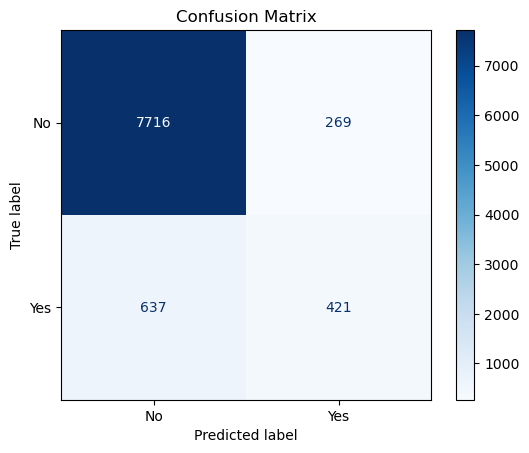

In [21]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No", "Yes"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.savefig("confusion_matrix.png", dpi=300, bbox_inches='tight')
plt.show()

In [22]:
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))


Detailed Classification Report:
              precision    recall  f1-score   support

          No       0.92      0.97      0.94      7985
         Yes       0.61      0.40      0.48      1058

    accuracy                           0.90      9043
   macro avg       0.77      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043



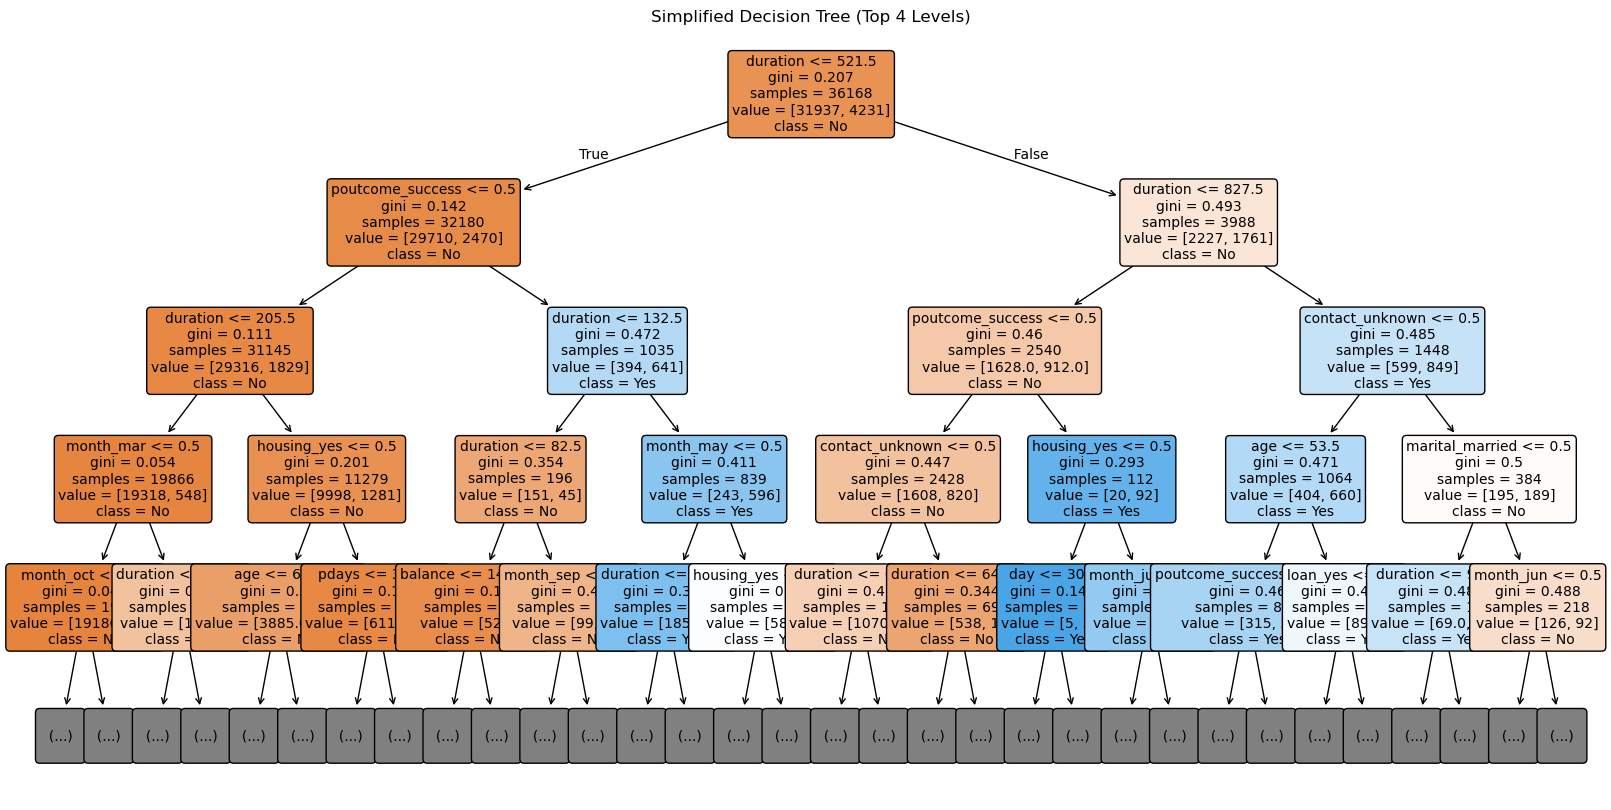

In [23]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=['No', 'Yes'],
    filled=True,
    rounded=True,
    max_depth=4, 
    fontsize=10
)
plt.title("Simplified Decision Tree (Top 4 Levels)")
plt.savefig("tree_top4.png", dpi=300, bbox_inches='tight')
plt.show()
